# SPMKP

### Import Library

In [104]:
import mysql.connector as mysql
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
import openpyxl

### Konek Database & Data

In [105]:
db_connection = mysql.connect(host = "10.4.19.15", 
                            database = 'mpninfo', 
                            user = 'indra', 
                            password= 'indra', 
                            port = 3306)

# READ FILE

In [106]:
mfwp = pd.read_csv('D:\DATA KANTOR\MASTERFILE\MFWP_AR_baru.csv',sep=';', dtype={'NPWP FULL':'str','Kode KLU':'str'})
kdmap = pd.read_excel('D:\DATA KANTOR\MASTERFILE\KODE_MAP_FILTERED.xlsx', engine='openpyxl', dtype={'KD MAP':'str'})

### QUERY

In [107]:
query = '''
SELECT * FROM SPMKP;
'''

### EXECUTE

In [108]:
spmkp = pd.read_sql(query, db_connection)
spmkp.tanggal = pd.to_datetime(spmkp.tanggal)
spmkp.head()

,id,admin,npwp,kpp,cabang,kdmap,bulan,tahun,tanggal,nominal
0,480723,007,013936174,007,000,411126,4,2021,2021-04-30,2.254413e+08
1,480722,007,021102314,007,000,411126,4,2021,2021-04-30,6.682853e+08
2,480721,007,010620482,007,000,411126,4,2021,2021-04-30,1.957928e+09
3,480720,007,013629035,007,000,411126,4,2021,2021-04-28,1.105107e+09
4,480719,007,025088980,007,000,411122,4,2021,2021-04-28,2.512000e+06


### ADD, DROP, URUTKAN

In [109]:
spmkp['npwpfull']= spmkp.npwp + spmkp.kpp + spmkp.cabang
spmkp = spmkp.drop(['id','admin','npwp','kpp','cabang','bulan','tahun'], axis=1)
spmkp = spmkp[['npwpfull','tanggal','kdmap','nominal']]
spmkp.head()

,npwpfull,tanggal,kdmap,nominal
0,013936174007000,2021-04-30,411126,2.254413e+08
1,021102314007000,2021-04-30,411126,6.682853e+08
2,010620482007000,2021-04-30,411126,1.957928e+09
3,013629035007000,2021-04-28,411126,1.105107e+09
4,025088980007000,2021-04-28,411122,2.512000e+06


In [110]:
spmkp.dtypes

npwpfull            object
tanggal     datetime64[ns]
kdmap               object
nominal            float64
dtype: object

# MERGE +MFWP

In [111]:
spmkp_ar = pd.merge(left=spmkp, right=mfwp,left_on='npwpfull', right_on='NPWP FULL',how='left')
spmkp_ar.head()

,npwpfull,tanggal,kdmap,nominal,NPWP FULL,NPWP9,Nama WP,Kode KLU,Status WP,Tgl.Daftar,NIP,Nama,Seksi
0,013936174007000,2021-04-30,411126,2.254413e+08,013936174007000,13936174.0,USAHATAMA SENTOSA MAS,46492,Aktif,01/01/1901,901100927.0,Aditya Rahadian,Waskon 3
1,021102314007000,2021-04-30,411126,6.682853e+08,021102314007000,21102314.0,DAYA MITRA SERASI,78101,Aktif,19/03/2002,60107042.0,Wihandy Novantiyono,Waskon 4
2,010620482007000,2021-04-30,411126,1.957928e+09,010620482007000,10620482.0,PIPA MAS PUTIH,24103,Aktif,31/12/1983,60085175.0,Pandan Candrawan,Waskon 2
3,013629035007000,2021-04-28,411126,1.105107e+09,013629035007000,13629035.0,HARINA CHEMICALS INDT.,20123,Aktif,04/05/1983,60105681.0,Donna Novita,Waskon 2
4,025088980007000,2021-04-28,411122,2.512000e+06,025088980007000,25088980.0,SONIA IMPEX,46491,Aktif,28/04/2006,60095720.0,Muhammad Sayuti,Waskon 3


# MERGE +KDMAP

In [112]:
spmkp_ar = pd.merge(left=spmkp_ar, right=kdmap, left_on='kdmap', right_on='KD MAP', how = 'left')
spmkp_ar.head()

,npwpfull,tanggal,kdmap,nominal,NPWP FULL,NPWP9,Nama WP,Kode KLU,Status WP,Tgl.Daftar,NIP,Nama,Seksi,KD MAP,KODE MAP
0,013936174007000,2021-04-30,411126,2.254413e+08,013936174007000,13936174.0,USAHATAMA SENTOSA MAS,46492,Aktif,01/01/1901,901100927.0,Aditya Rahadian,Waskon 3,411126,PPh 25 Badan
1,021102314007000,2021-04-30,411126,6.682853e+08,021102314007000,21102314.0,DAYA MITRA SERASI,78101,Aktif,19/03/2002,60107042.0,Wihandy Novantiyono,Waskon 4,411126,PPh 25 Badan
2,010620482007000,2021-04-30,411126,1.957928e+09,010620482007000,10620482.0,PIPA MAS PUTIH,24103,Aktif,31/12/1983,60085175.0,Pandan Candrawan,Waskon 2,411126,PPh 25 Badan
3,013629035007000,2021-04-28,411126,1.105107e+09,013629035007000,13629035.0,HARINA CHEMICALS INDT.,20123,Aktif,04/05/1983,60105681.0,Donna Novita,Waskon 2,411126,PPh 25 Badan
4,025088980007000,2021-04-28,411122,2.512000e+06,025088980007000,25088980.0,SONIA IMPEX,46491,Aktif,28/04/2006,60095720.0,Muhammad Sayuti,Waskon 3,411122,PPh 22


# REDUCE DATA

In [113]:
spmkp_ar = spmkp_ar.drop(['NPWP FULL','NPWP9','NIP','kdmap','KD MAP'], axis=1)
spmkp_ar = spmkp_ar[['npwpfull','Nama WP','Kode KLU','Status WP','Nama','Seksi','KODE MAP','tanggal','nominal']]
spmkp_ar = spmkp_ar.rename(columns={
   'npwpfull':'Npwp_Full','Nama WP':'Nama_WP','Kode KLU':'Kode_Klu','Status WP':'Status_WP','Tgl.Daftar':'Tgl_Daftar','Nama':'AR','KODE MAP':'KDMAP','tanggal':'Tanggal','nominal':'Nominal' 
})
spmkp_ar.head()

,Npwp_Full,Nama_WP,Kode_Klu,Status_WP,AR,Seksi,KDMAP,Tanggal,Nominal
0,013936174007000,USAHATAMA SENTOSA MAS,46492,Aktif,Aditya Rahadian,Waskon 3,PPh 25 Badan,2021-04-30,2.254413e+08
1,021102314007000,DAYA MITRA SERASI,78101,Aktif,Wihandy Novantiyono,Waskon 4,PPh 25 Badan,2021-04-30,6.682853e+08
2,010620482007000,PIPA MAS PUTIH,24103,Aktif,Pandan Candrawan,Waskon 2,PPh 25 Badan,2021-04-30,1.957928e+09
3,013629035007000,HARINA CHEMICALS INDT.,20123,Aktif,Donna Novita,Waskon 2,PPh 25 Badan,2021-04-28,1.105107e+09
4,025088980007000,SONIA IMPEX,46491,Aktif,Muhammad Sayuti,Waskon 3,PPh 22,2021-04-28,2.512000e+06


## SELEKSI

### 2021

In [114]:
spmkp_ar_2021 = spmkp_ar.loc[(spmkp_ar['Tanggal']) >'2020-12-31']
spmkp_ar_2021.head()

,Npwp_Full,Nama_WP,Kode_Klu,Status_WP,AR,Seksi,KDMAP,Tanggal,Nominal
0,013936174007000,USAHATAMA SENTOSA MAS,46492,Aktif,Aditya Rahadian,Waskon 3,PPh 25 Badan,2021-04-30,2.254413e+08
1,021102314007000,DAYA MITRA SERASI,78101,Aktif,Wihandy Novantiyono,Waskon 4,PPh 25 Badan,2021-04-30,6.682853e+08
2,010620482007000,PIPA MAS PUTIH,24103,Aktif,Pandan Candrawan,Waskon 2,PPh 25 Badan,2021-04-30,1.957928e+09
3,013629035007000,HARINA CHEMICALS INDT.,20123,Aktif,Donna Novita,Waskon 2,PPh 25 Badan,2021-04-28,1.105107e+09
4,025088980007000,SONIA IMPEX,46491,Aktif,Muhammad Sayuti,Waskon 3,PPh 22,2021-04-28,2.512000e+06


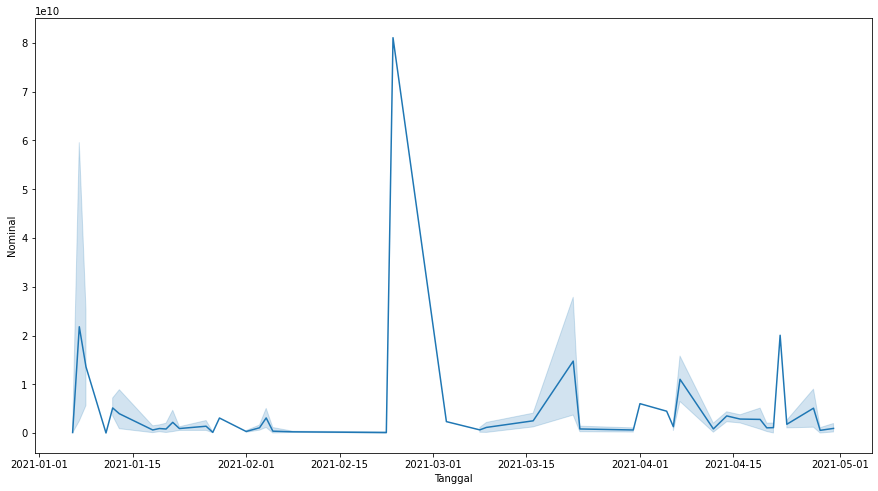

In [115]:
plt.figure(figsize=(15,8))
sb.lineplot(x= 'Tanggal', y= 'Nominal', data = spmkp_ar_2021);

In [116]:
spmkp_ar_2021['bulan'] = spmkp_ar_2021.Tanggal.dt.month
spmkp_ar_2021.head()

<ipython-input-116-da6ac53f5300>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spmkp_ar_2021['bulan'] = spmkp_ar_2021.Tanggal.dt.month


,Npwp_Full,Nama_WP,Kode_Klu,Status_WP,AR,Seksi,KDMAP,Tanggal,Nominal,bulan
0,013936174007000,USAHATAMA SENTOSA MAS,46492,Aktif,Aditya Rahadian,Waskon 3,PPh 25 Badan,2021-04-30,2.254413e+08,4
1,021102314007000,DAYA MITRA SERASI,78101,Aktif,Wihandy Novantiyono,Waskon 4,PPh 25 Badan,2021-04-30,6.682853e+08,4
2,010620482007000,PIPA MAS PUTIH,24103,Aktif,Pandan Candrawan,Waskon 2,PPh 25 Badan,2021-04-30,1.957928e+09,4
3,013629035007000,HARINA CHEMICALS INDT.,20123,Aktif,Donna Novita,Waskon 2,PPh 25 Badan,2021-04-28,1.105107e+09,4
4,025088980007000,SONIA IMPEX,46491,Aktif,Muhammad Sayuti,Waskon 3,PPh 22,2021-04-28,2.512000e+06,4


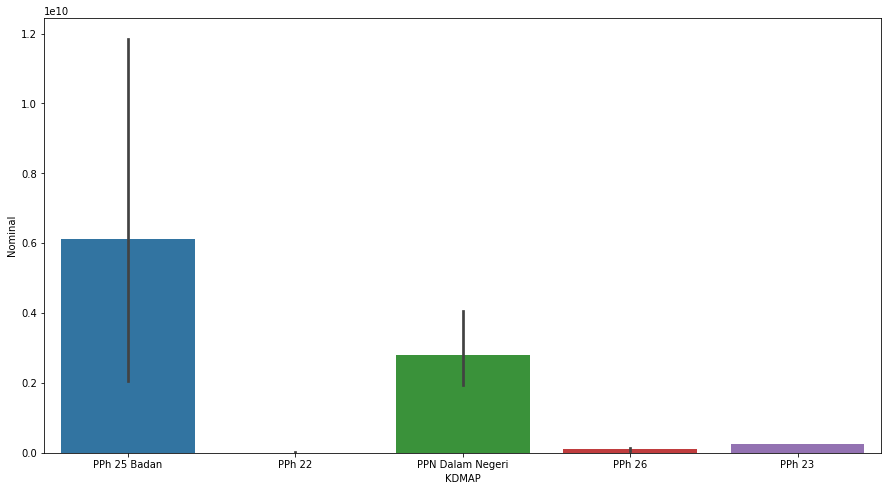

In [120]:
plt.figure(figsize=(15,8))
sb.barplot(x='KDMAP', y='Nominal', data=spmkp_ar_2021);

In [119]:
spmkp_ar.to_excel('D:\DATA KANTOR\JUPYTER NOTEBOOK\Export\SPMKP.xlsx',index=False)